# Spanish Electricity Market Analysis: Part 1/2

## Part 2: Statistics and Data Visualization

In [77]:
import pandas as pd
import seaborn as sns
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import numpy as np
import datetime as dt

sns.set()

In [14]:
plt.style.use('ggplot')

### Daily electricity generation. Visualization

In [31]:
os.getcwd()
PBF_total_df = pd.read_csv('cleaned_data/PBF_total_df.csv', index_col=0) #reading the csv file with the aggregated data from 2014-2018. 

In [32]:
PBF_total_df.head()

,value
date,
2014-01-01,642771.8
2014-01-02,658078.5
2014-01-03,680564.6
2014-01-04,644494.7
2014-01-05,598661.4


In [34]:
PBF_total_df.index = pd.to_datetime(PBF_total_df.index)


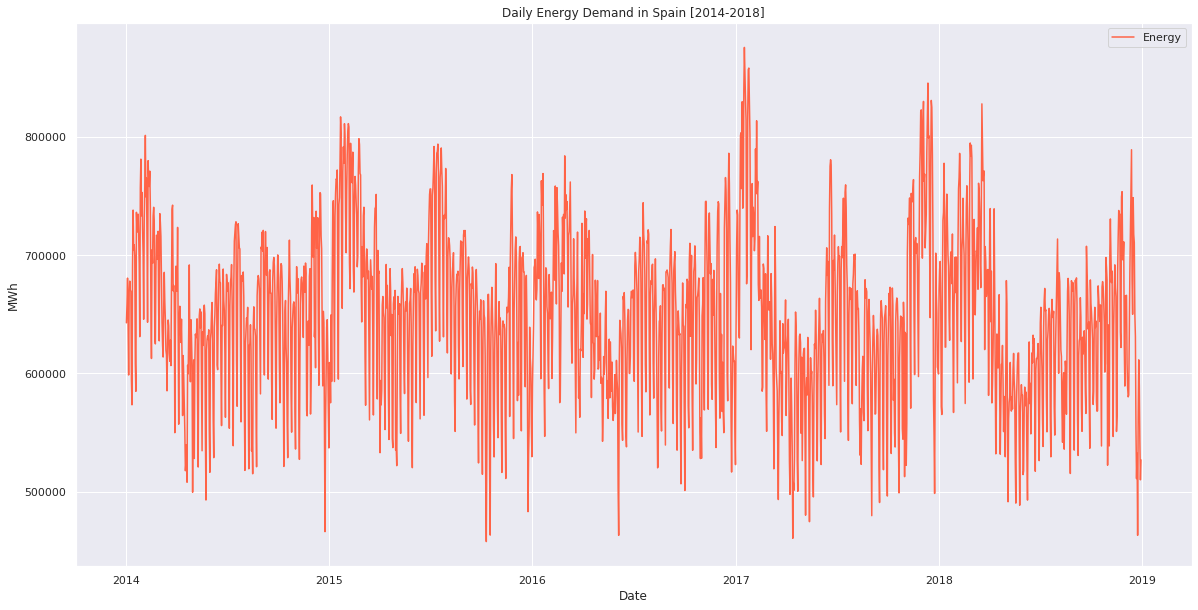

In [110]:
plt.figure(figsize=(20,10))
plt.plot(PBF_total_df.index, PBF_total_df.value, label='Energy', color='tomato' )
plt.ylabel('MWh')
plt.xlabel('Date')
plt.title('Daily Energy Demand in Spain [2014-2018]')
#plt.xlim(('2014-01-01', '2018-12-31'))
plt.legend()
plt.show()


In order to be able to perform a data analysis over time-series, we need to split our date into year, quarter, month, and weekday

In [58]:
PBF_total_df['year'] = PBF_total_df.index.year #to specify only the year. 
PBF_total_df['quarter'] = PBF_total_df.index.quarter #to see to which season it belongs
PBF_total_df['month'] = PBF_total_df.index.month
PBF_total_df['week'] = PBF_total_df.index.week
PBF_total_df['weekday'] = PBF_total_df.index.weekday

In [63]:
PBF_total_df[-10:]

,value,year,quarter,month,week,weekday
date,,,,,,
2018-12-21,553252.4,2018,4,12,51,4
2018-12-22,511090.4,2018,4,12,51,5
2018-12-23,532506.3,2018,4,12,51,6
2018-12-24,463137.8,2018,4,12,52,0
2018-12-25,562606.4,2018,4,12,52,1
2018-12-26,611465.3,2018,4,12,52,2
2018-12-27,589771.5,2018,4,12,52,3
2018-12-28,543353.5,2018,4,12,52,4
2018-12-29,510049.1,2018,4,12,52,5


### Annual Boxplot distribution. Is Electricity consumption increasing? 


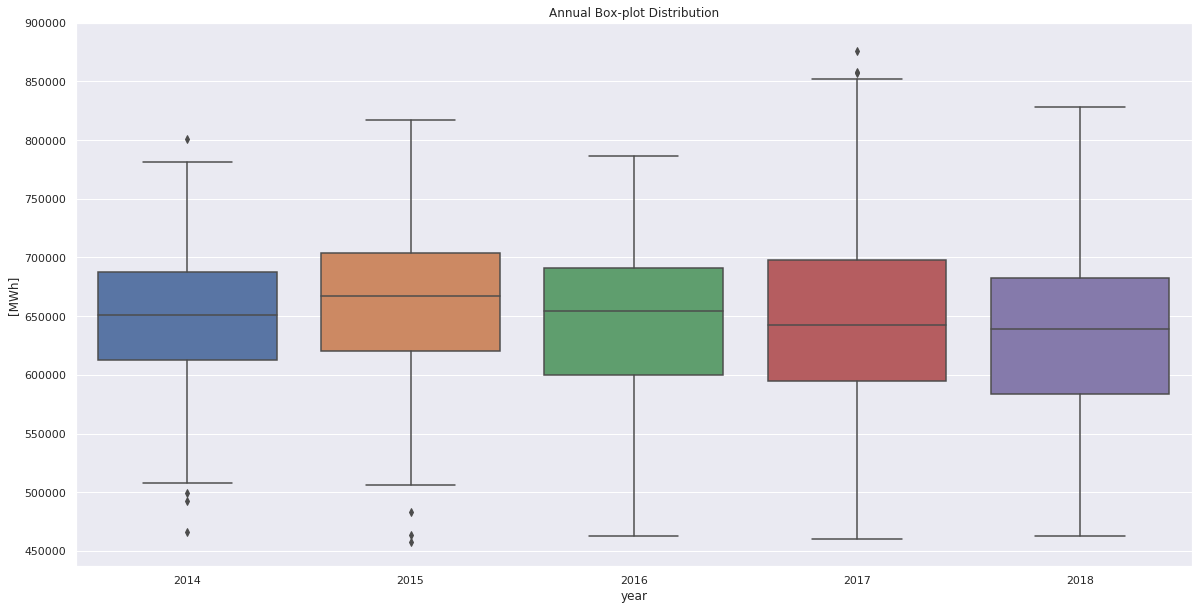

In [108]:
plt.figure(figsize=(20,10))
sns.boxplot(data=PBF_total_df["2014":"2018"], x="year", y="value")
plt.title("Annual Box-plot Distribution")
plt.ylabel('[MWh]')
plt.yticks(np.arange(450000,950000,50000))
plt.show()


**hypotheses testing (si hay tiempo)**

### Seasonality trend. Does electricity consumption vary depending on the season? 

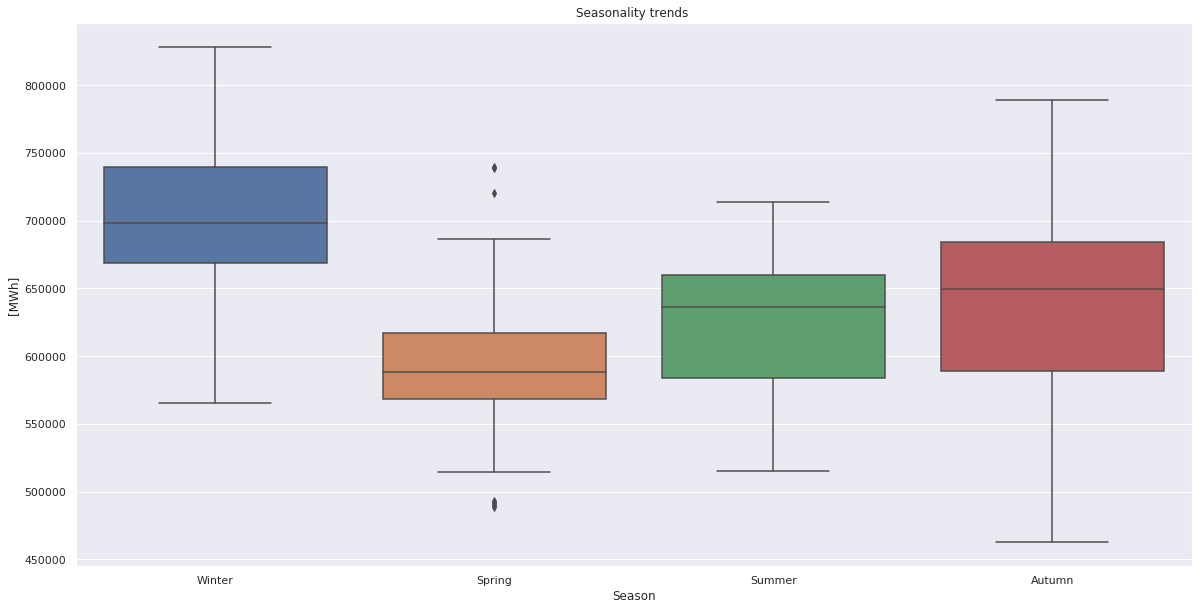

In [104]:
plt.figure(figsize=(20,10))
sns.boxplot(data=PBF_total_df['2018'], x="quarter", y="value")
plt.title("Seasonality trends ")
plt.ylabel('[MWh]')
plt.xlabel('Season')
plt.xticks(np.arange(0,4), ('Winter', 'Spring', 'Summer', 'Autumn'))
plt.show()

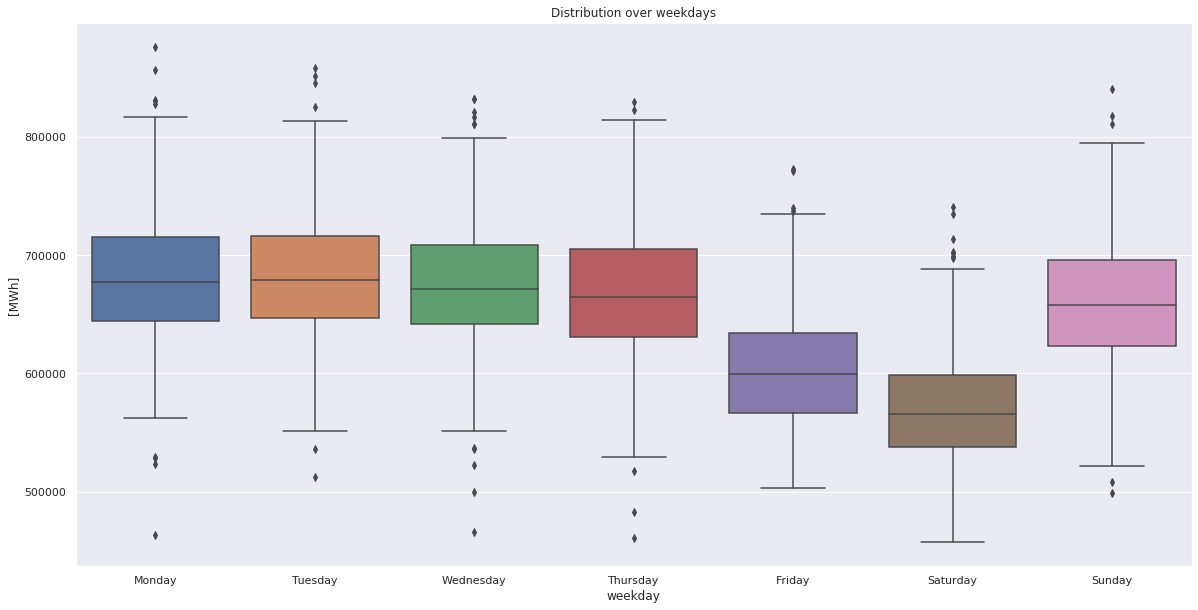

In [94]:
plt.figure(figsize=(20,10))
sns.boxplot(data=PBF_total_df, x="weekday", y="value")
plt.title("Distribution over weekdays")
plt.xticks(np.arange(0,7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))

plt.ylabel("[MWh]")
plt.show()


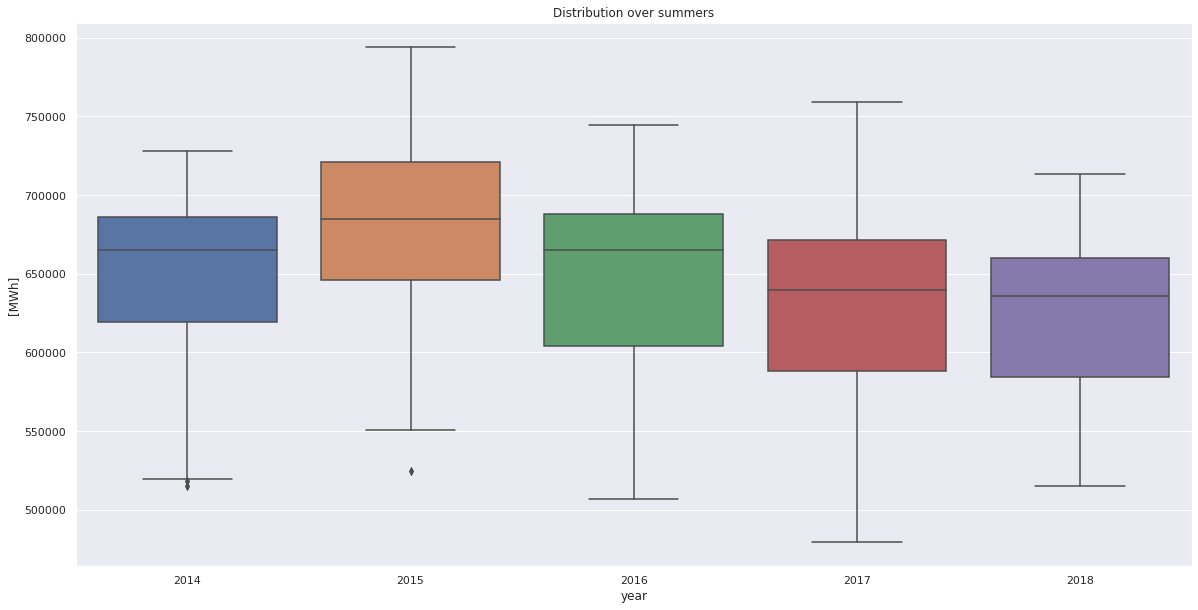

In [112]:
plt.figure(figsize=(20,10))
sns.boxplot(data=PBF_total_df[PBF_total_df['quarter']==3], x="year", y="value")
plt.title("Distribution over summers")


plt.ylabel("[MWh]")
plt.show()

https://earthobservatory.nasa.gov/images/87359/2015-was-the-hottest-year-on-record

### Daily electricity generation per source. Visualization

In [141]:
os.getcwd()

'/home/ingrid/Documents/DA_Ironhack/Week5/Project-Week-5-Your-Own-Project/your-project'

In [151]:
gen_source_df = pd.read_csv('cleaned_data/generation_per_source.csv') #reading the csv file with the aggregated data from 2014-2018. 

In [152]:
gen_source_df['date'] = pd.to_datetime(gen_source_df['date'])

In [153]:
gen_source_df.dtypes #we check it is a datetime object 

date         datetime64[ns]
source               object
value_MWh           float64
dtype: object

In [154]:
gen_source_df['year'] = gen_source_df['date'].dt.year

In [155]:
gen_source_df.head()

,date,source,value_MWh,year
0,2014-01-01,CHP,4497.5,2014
1,2014-01-01,coal,2498.7,2014
2,2014-01-01,hydro_1,87564.8,2014
3,2014-01-01,hydro_2,15226.2,2014
4,2014-01-01,natural_gas,75993.1,2014


In this case, we are not considering the two types of hydro, since in this project they can be both considered as hydro renewable sources. For this reason, we will aggregate them. 


In [161]:
names = {'hydro_1':'hydro', 'hydro_2':'hydro'}
gen_source_df['source'].replace(names,inplace=True)
gen_source_df = gen_source_df.groupby(['date', 'source','year'], as_index=False).agg('sum')

In [164]:
gen_source_df.head()

,date,source,year,value_MWh
0,2014-01-01,CHP,2014,4497.5
1,2014-01-01,coal,2014,2498.7
2,2014-01-01,hydro,2014,102791.0
3,2014-01-01,natural_gas,2014,75993.1
4,2014-01-01,nuclear,2014,144654.6


### Adding new columns to have renewable and non-renewable sources

In [247]:
gen_source_df.source.unique()

array(['CHP', 'coal', 'hydro', 'natural_gas', 'nuclear', 'solar_PV',
       'wind_power'], dtype=object)

In [295]:
RES_lst = ['hydro', 'solar_PV', 'wind_power']
CES_lst = ['CHP', 'coal', 'natural_gas', 'nuclear']
total_sources = RES_lst + CES_lst

In [254]:
gen_source_df['RES_CES'] = gen_source_df['source'].apply(lambda x: 'Renewable' if x in RES_lst else 'Conventional')


In [342]:
gen_source_df.head()

,date,source,year,value_MWh,RES_CES
0,2014-01-01,CHP,2014,4497.5,Conventional
1,2014-01-01,coal,2014,2498.7,Conventional
2,2014-01-01,hydro,2014,102791.0,Renewable
3,2014-01-01,natural_gas,2014,75993.1,Conventional
4,2014-01-01,nuclear,2014,144654.6,Conventional


### Grouping by year and source to plot a pie chart
### Pie chart: evolution of Energy Resources for Electricity generation in Spain (yearly total electricity produced)

In [263]:
agg_gen = gen_source_df.groupby(by=['year', 'RES_CES', 'source']).sum()

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


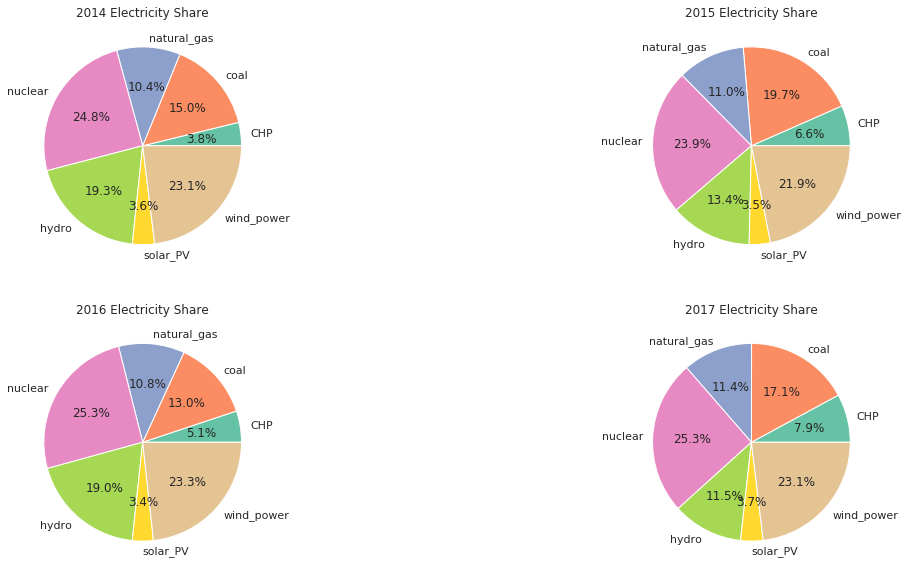

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]


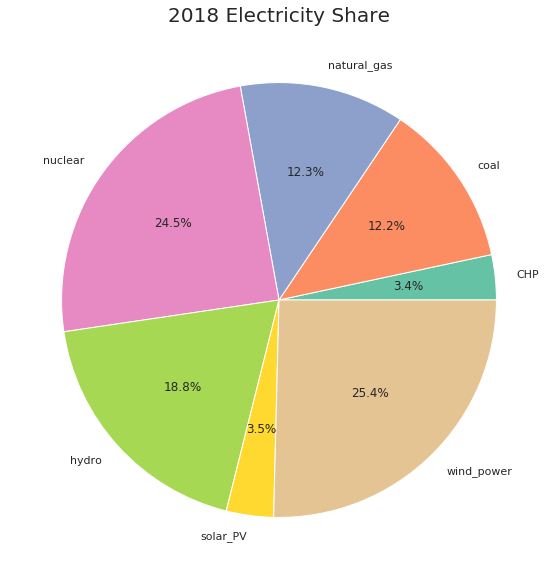

In [321]:
years=agg_gen.index.levels[0][:-1]
labels=agg_gen.index.get_level_values(2)[:len(total_sources)]
fig,axs = plt.subplots(2,2, figsize=(20,10))
axs = axs.ravel()

for i in range(len(years)):
    axs[i].pie(agg_gen.loc[years[i],:], labels=labels, colors= outer_colors, autopct='%1.1f%%')
    axs[i].set_title(str(years[i]) + ' Electricity Share')

plt.show()

plt.figure(figsize=(20,10))
plt.pie(agg_gen.loc[2018,:], labels=labels, colors= outer_colors, autopct='%1.1f%%')
plt.title('2018 Electricity Share', fontsize=20)


plt.show()

### Test for nested_pie_charts

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<Figure size 2160x2160 with 0 Axes>

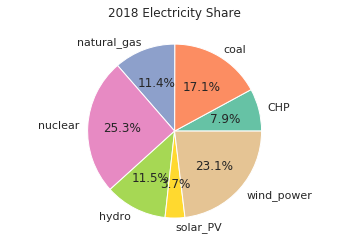

In [341]:
cmap = plt.get_cmap("Set2")
outer_colors = cmap(np.arange(10))
inner_colors = cmap(np.arange(2))

plt.figure(figsize=(30,30))


labels=agg_gen.index.get_level_values(2)[:len(total_sources)]

fig, ax= plt.subplots()
ax.axis('equal')
width=0.3

plt.pie(agg_gen.loc[years[i],:], labels=labels, colors= outer_colors, autopct='%1.1f%%')
plt.title('2018 Electricity Share')

plt.show()



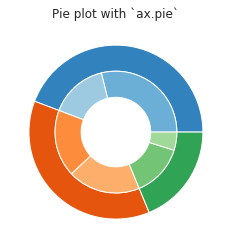

In [337]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()


### 2 days energy consumption in Spain

In [348]:
os.getcwd()

'/home/ingrid/Documents/DA_Ironhack/Week5/Project-Week-5-Your-Own-Project/your-project'

In [431]:
time_series = pd.read_csv('datasets/20190722_PBF_sources_2.csv')

In [432]:
time_series = time_series.drop(['geoid', 'geoname', 'id'], axis=1)

In [433]:
time_series.head()

,name,value,datetime
0,PBF_total,27253.3,2019-07-21T00:00:00+02:00
1,PBF_total,26056.7,2019-07-21T01:00:00+02:00
2,PBF_total,24812.3,2019-07-21T02:00:00+02:00
3,PBF_total,23842.3,2019-07-21T03:00:00+02:00
4,PBF_total,23365.2,2019-07-21T04:00:00+02:00


In [434]:
time_series.dtypes

name         object
value       float64
datetime     object
dtype: object

In [435]:
time_series['date'] = pd.to_datetime(time_series['datetime'])
time_series.drop('datetime', axis=1, inplace=True)


In [436]:
time_series['day'] = time_series['date'].dt.day
time_series['hour'] = time_series['date'].dt.hour

In [437]:
time_series.head(100)

,name,value,date,day,hour
0,PBF_total,27253.3,2019-07-21 00:00:00+02:00,21,0
1,PBF_total,26056.7,2019-07-21 01:00:00+02:00,21,1
2,PBF_total,24812.3,2019-07-21 02:00:00+02:00,21,2
3,PBF_total,23842.3,2019-07-21 03:00:00+02:00,21,3
4,PBF_total,23365.2,2019-07-21 04:00:00+02:00,21,4
5,PBF_total,22948.4,2019-07-21 05:00:00+02:00,21,5
6,PBF_total,22515.3,2019-07-21 06:00:00+02:00,21,6
7,PBF_total,21849.5,2019-07-21 07:00:00+02:00,21,7
8,PBF_total,23327.6,2019-07-21 08:00:00+02:00,21,8
9,PBF_total,25475.6,2019-07-21 09:00:00+02:00,21,9


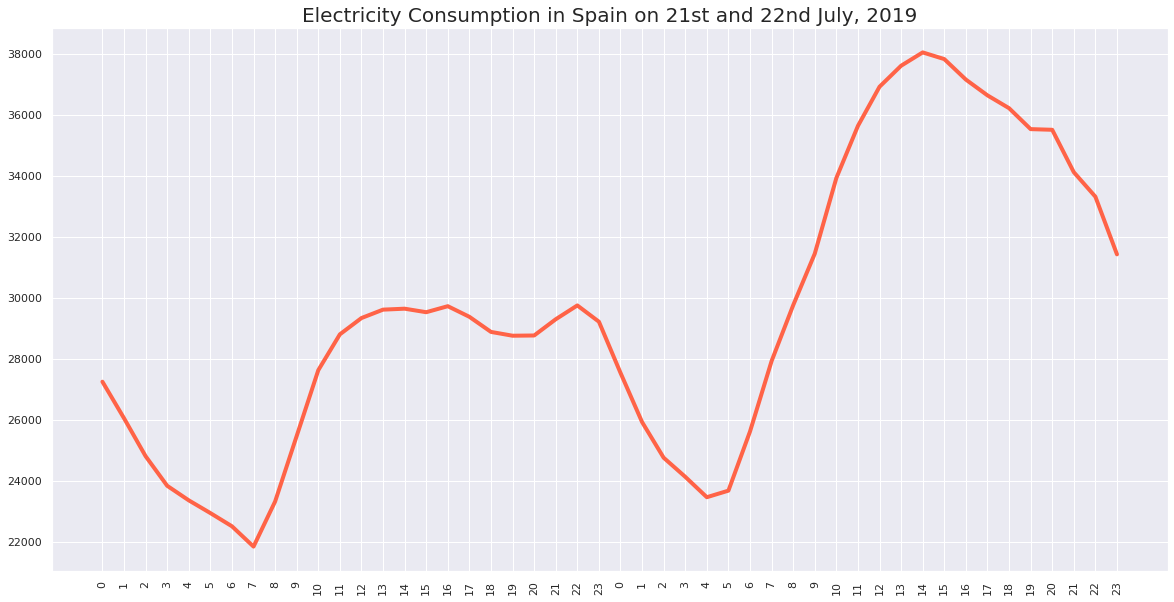

In [438]:
plt.figure(figsize=(20,10))
plt.plot(time_series[time_series['name']=='PBF_total']['value'], linewidth=4, color='tomato')
plt.xticks(np.arange(48), time_series[time_series['name']=='PBF_total']['hour'], rotation='vertical')
plt.title('Electricity Consumption in Spain on 21st and 22nd July, 2019', fontsize=20)
plt.show()

In [439]:
time_series

,name,value,date,day,hour
0,PBF_total,27253.3,2019-07-21 00:00:00+02:00,21,0
1,PBF_total,26056.7,2019-07-21 01:00:00+02:00,21,1
2,PBF_total,24812.3,2019-07-21 02:00:00+02:00,21,2
3,PBF_total,23842.3,2019-07-21 03:00:00+02:00,21,3
4,PBF_total,23365.2,2019-07-21 04:00:00+02:00,21,4
5,PBF_total,22948.4,2019-07-21 05:00:00+02:00,21,5
6,PBF_total,22515.3,2019-07-21 06:00:00+02:00,21,6
7,PBF_total,21849.5,2019-07-21 07:00:00+02:00,21,7
8,PBF_total,23327.6,2019-07-21 08:00:00+02:00,21,8
9,PBF_total,25475.6,2019-07-21 09:00:00+02:00,21,9


([<matplotlib.axis.XTick at 0x7f2bc111f780>,
 <a list of 48 Text xticklabel objects>)

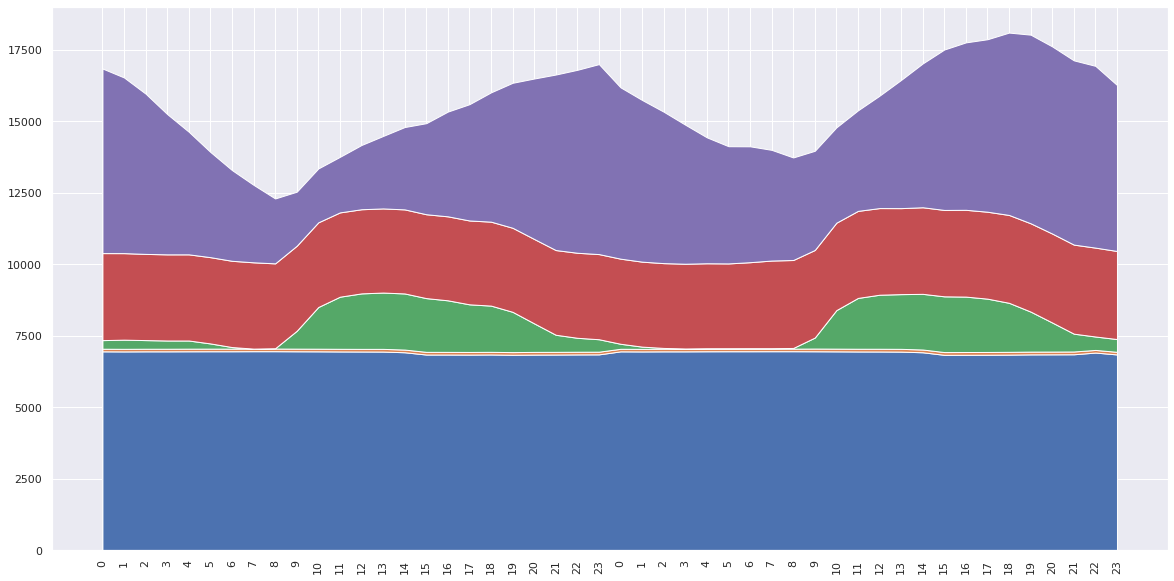

In [441]:
plt.figure(figsize=(20,10))

y1 = time_series[time_series['name']=='Nuclear']['value']
y2 = time_series[time_series['name']=='Biogas']['value']
y3 = time_series[time_series['name']=='SolarThermal']['value']
y4 = time_series[time_series['name']=='Natural_gas']['value']
y5 = time_series[time_series['name']=='Wind']['value']


plt.stackplot(np.arange(48),y1,y2,y3,y4,y5)
plt.xticks(np.arange(48), time_series[time_series['name']=='PBF_total']['hour'], rotation='vertical')

ValueError: operands could not be broadcast together with shapes (48,) (910,) 

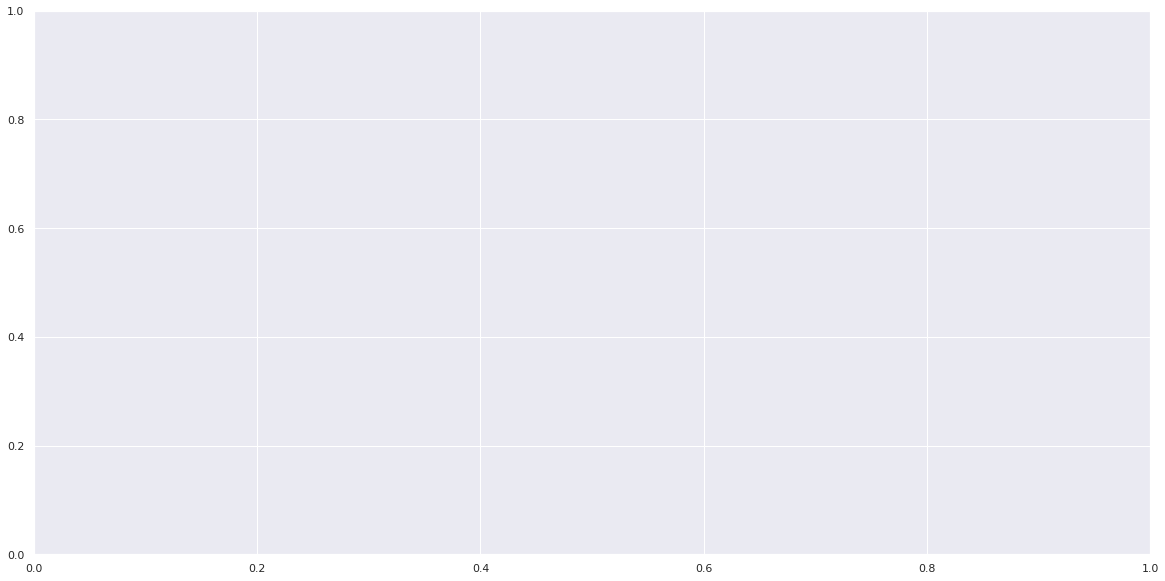

In [403]:
plt.figure(figsize=(20,10))
x=time_series[time_series['name']=='PBF_total']['hour']
plt.stackplot(x, time_series['value'])
plt.xticks(np.arange(48), time_series[time_series['name']=='PBF_total']['hour'], rotation='vertical')

plt.title('Electricity Consumption in Spain on 21st and 22nd July, 2019', fontsize=20)

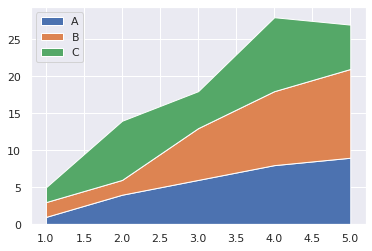

In [396]:
# Data
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]

plt.stackplot(x,y, labels=['A','B','C'])
plt.legend(loc='upper left')
plt.show()

In [404]:
y

[[1, 4, 6, 8, 9], [2, 2, 7, 10, 12], [2, 8, 5, 10, 6]]

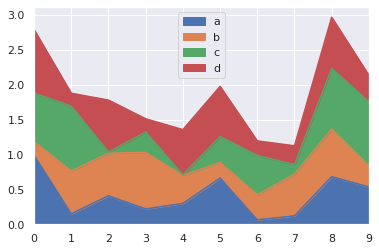

In [407]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area();

In [408]:
df

,a,b,c,d
0,0.987108,0.196385,0.695600,0.908178
1,0.150612,0.614565,0.927103,0.183750
2,0.408242,0.608776,0.018182,0.743377
3,0.220241,0.810247,0.290192,0.189663
4,0.298840,0.401073,0.008000,0.647661
5,0.662451,0.224135,0.369951,0.717835
6,0.064335,0.358955,0.563446,0.207542
7,0.120821,0.597772,0.136370,0.269277
8,0.681847,0.684068,0.865912,0.732896
9,0.535412,0.299447,0.920209,0.377959
